# Gálatas



## Importar bibliotecas 

##### Bibliotecas de manipulação de dados, de NLP e aprendizado de máquina

In [2]:
import numpy  as np
import pandas as pd
import json
import pandas

In [3]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [4]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [5]:
from sklearn import cluster

## Uplod dos dados 

##### Dataset Biblia Sagrada (King James) ----- Gálatas 

In [5]:
Galatas_1 = "Paul, an apostle, (not of men, neither by man, but by Jesus Christ, and God the Father, who raised him from the dead;)And all the brothers which are with me, to the churches of Galatia:Grace be to you and peace from God the Father, and from our Lord Jesus Christ,Who gave himself for our sins, that he might deliver us from this present evil world, according to the will of God and our Father:To whom be glory for ever and ever. Amen.I marvel that you are so soon removed from him that called you into the grace of Christ to another gospel:Which is not another; but there be some that trouble you, and would pervert the gospel of Christ.But though we, or an angel from heaven, preach any other gospel to you than that which we have preached to you, let him be accursed.As we said before, so say I now again, if any man preach any other gospel to you than that you have received, let him be accursed.For do I now persuade men, or God? or do I seek to please men? for if I yet pleased men, I should not be the servant of Christ.But I certify you, brothers, that the gospel which was preached of me is not after man.For I neither received it of man, neither was I taught it, but by the revelation of Jesus Christ.For you have heard of my conversation in time past in the Jews'religion, how that beyond measure I persecuted the church of God, and wasted it:And profited in the Jews'religion above many my equals in my own nation, being more exceedingly zealous of the traditions of my fathers.But when it pleased God, who separated me from my mother' womb, and called me by his grace,To reveal his Son in me, that I might preach him among the heathen; immediately I conferred not with flesh and blood:Neither went I up to Jerusalem to them which were apostles before me; but I went into Arabia, and returned again to Damascus.Then after three years I went up to Jerusalem to see Peter, and stayed with him fifteen days.But other of the apostles saw I none, save James the Lord' brother.Now the things which I write to you, behold, before God, I lie not.Afterwards I came into the regions of Syria and Cilicia;And was unknown by face to the churches of Judaea which were in Christ:But they had heard only, That he which persecuted us in times past now preaches the faith which once he destroyed.And they glorified God in me.".lower()

In [6]:
Galatas_2 = "Then fourteen years after I went up again to Jerusalem with Barnabas, and took Titus with me also.And I went up by revelation, and communicated to them that gospel which I preach among the Gentiles, but privately to them which were of reputation, lest by any means I should run, or had run, in vain.But neither Titus, who was with me, being a Greek, was compelled to be circumcised:And that because of false brothers unawares brought in, who came in privately to spy out our liberty which we have in Christ Jesus, that they might bring us into bondage:To whom we gave place by subjection, no, not for an hour; that the truth of the gospel might continue with you.But of these who seemed to be somewhat, (whatever they were, it makes no matter to me: God accepts no man' person:) for they who seemed to be somewhat in conference added nothing to me:But contrariwise, when they saw that the gospel of the uncircumcision was committed to me, as the gospel of the circumcision was to Peter;(For he that worked effectually in Peter to the apostleship of the circumcision, the same was mighty in me toward the Gentiles:)And when James, Cephas, and John, who seemed to be pillars, perceived the grace that was given to me, they gave to me and Barnabas the right hands of fellowship; that we should go to the heathen, and they to the circumcision.Only they would that we should remember the poor; the same which I also was forward to do.But when Peter was come to Antioch, I withstood him to the face, because he was to be blamed.For before that certain came from James, he did eat with the Gentiles: but when they were come, he withdrew and separated himself, fearing them which were of the circumcision.And the other Jews dissembled likewise with him; so that Barnabas also was carried away with their dissimulation.But when I saw that they walked not uprightly according to the truth of the gospel, I said to Peter before them all, If you, being a Jew, live after the manner of Gentiles, and not as do the Jews, why compel you the Gentiles to live as do the Jews?We who are Jews by nature, and not sinners of the Gentiles,Knowing that a man is not justified by the works of the law, but by the faith of Jesus Christ, even we have believed in Jesus Christ, that we might be justified by the faith of Christ, and not by the works of the law: for by the works of the law shall no flesh be justified.But if, while we seek to be justified by Christ, we ourselves also are found sinners, is therefore Christ the minister of sin? God forbid.For if I build again the things which I destroyed, I make myself a transgressor.For I through the law am dead to the law, that I might live to God.I am crucified with Christ: nevertheless I live; yet not I, but Christ lives in me: and the life which I now live in the flesh I live by the faith of the Son of God, who loved me, and gave himself for me.I do not frustrate the grace of God: for if righteousness come by the law, then Christ is dead in vain.".lower()

In [7]:
Galatas_3 = "O foolish Galatians, who has bewitched you, that you should not obey the truth, before whose eyes Jesus Christ has been evidently set forth, crucified among you?This only would I learn of you, Received you the Spirit by the works of the law, or by the hearing of faith?Are you so foolish? having begun in the Spirit, are you now made perfect by the flesh?Have you suffered so many things in vain? if it be yet in vain.He therefore that ministers to you the Spirit, and works miracles among you, does he it by the works of the law, or by the hearing of faith?Even as Abraham believed God, and it was accounted to him for righteousness.Know you therefore that they which are of faith, the same are the children of Abraham.And the scripture, foreseeing that God would justify the heathen through faith, preached before the gospel to Abraham, saying, In you shall all nations be blessed.So then they which be of faith are blessed with faithful Abraham.For as many as are of the works of the law are under the curse: for it is written, Cursed is every one that continues not in all things which are written in the book of the law to do them.But that no man is justified by the law in the sight of God, it is evident: for, The just shall live by faith.And the law is not of faith: but, The man that does them shall live in them.Christ has redeemed us from the curse of the law, being made a curse for us: for it is written, Cursed is every one that hangs on a tree:That the blessing of Abraham might come on the Gentiles through Jesus Christ; that we might receive the promise of the Spirit through faith.Brothers, I speak after the manner of men; Though it be but a man' covenant, yet if it be confirmed, no man cancels, or adds thereto.Now to Abraham and his seed were the promises made. He said not, And to seeds, as of many; but as of one, And to your seed, which is Christ.And this I say, that the covenant, that was confirmed before of God in Christ, the law, which was four hundred and thirty years after, cannot cancel, that it should make the promise of none effect.For if the inheritance be of the law, it is no more of promise: but God gave it to Abraham by promise.Why then serves the law? It was added because of transgressions, till the seed should come to whom the promise was made; and it was ordained by angels in the hand of a mediator.Now a mediator is not a mediator of one, but God is one.Is the law then against the promises of God? God forbid: for if there had been a law given which could have given life, truly righteousness should have been by the law.But the scripture has concluded all under sin, that the promise by faith of Jesus Christ might be given to them that believe.But before faith came, we were kept under the law, shut up to the faith which should afterwards be revealed.Why the law was our schoolmaster to bring us to Christ, that we might be justified by faith.But after that faith is come, we are no longer under a schoolmaster.For you are all the children of God by faith in Christ Jesus.For as many of you as have been baptized into Christ have put on Christ.There is neither Jew nor Greek, there is neither bond nor free, there is neither male nor female: for you are all one in Christ Jesus.And if you be Christ', then are you Abraham' seed, and heirs according to the promise.".lower()

In [8]:
Galatas_4 = "Now I say, That the heir, as long as he is a child, differs nothing from a servant, though he be lord of all;But is under tutors and governors until the time appointed of the father.Even so we, when we were children, were in bondage under the elements of the world:But when the fullness of the time was come, God sent forth his Son, made of a woman, made under the law,To redeem them that were under the law, that we might receive the adoption of sons.And because you are sons, God has sent forth the Spirit of his Son into your hearts, crying, Abba, Father.Why you are no more a servant, but a son; and if a son, then an heir of God through Christ.However, then, when you knew not God, you did service to them which by nature are no gods.But now, after that you have known God, or rather are known of God, how turn you again to the weak and beggarly elements, whereunto you desire again to be in bondage?You observe days, and months, and times, and years.I am afraid of you, lest I have bestowed on you labor in vain.Brothers, I beseech you, be as I am; for I am as you are: you have not injured me at all.You know how through infirmity of the flesh I preached the gospel to you at the first.And my temptation which was in my flesh you despised not, nor rejected; but received me as an angel of God, even as Christ Jesus.Where is then the blessedness you spoke of? for I bear you record, that, if it had been possible, you would have plucked out your own eyes, and have given them to me.Am I therefore become your enemy, because I tell you the truth?They zealously affect you, but not well; yes, they would exclude you, that you might affect them.But it is good to be zealously affected always in a good thing, and not only when I am present with you.My little children, of whom I travail in birth again until Christ be formed in you,I desire to be present with you now, and to change my voice; for I stand in doubt of you.Tell me, you that desire to be under the law, do you not hear the law?For it is written, that Abraham had two sons, the one by a female slave, the other by a free woman.But he who was of the female slave was born after the flesh; but he of the free woman was by promise.Which things are an allegory: for these are the two covenants; the one from the mount Sinai, which engenders to bondage, which is Agar.For this Agar is mount Sinai in Arabia, and answers to Jerusalem which now is, and is in bondage with her children.But Jerusalem which is above is free, which is the mother of us all.For it is written, Rejoice, you barren that bore not; break forth and cry, you that travail not: for the desolate has many more children than she which has an husband.Now we, brothers, as Isaac was, are the children of promise.But as then he that was born after the flesh persecuted him that was born after the Spirit, even so it is now.Nevertheless what said the scripture? Cast out the female slave and her son: for the son of the female slave shall not be heir with the son of the free woman.So then, brothers, we are not children of the female slave, but of the free.".lower()

In [9]:
Galatas_5 = "Stand fast therefore in the liberty with which Christ has made us free, and be not entangled again with the yoke of bondage.Behold, I Paul say to you, that if you be circumcised, Christ shall profit you nothing.For I testify again to every man that is circumcised, that he is a debtor to do the whole law.Christ is become of no effect to you, whoever of you are justified by the law; you are fallen from grace.For we through the Spirit wait for the hope of righteousness by faith.For in Jesus Christ neither circumcision avails any thing, nor uncircumcision; but faith which works by love.You did run well; who did hinder you that you should not obey the truth?This persuasion comes not of him that calls you.A little leaven leavens the whole lump.I have confidence in you through the Lord, that you will be none otherwise minded: but he that troubles you shall bear his judgment, whoever he be.And I, brothers, if I yet preach circumcision, why do I yet suffer persecution? then is the offense of the cross ceased.I would they were even cut off which trouble you.For, brothers, you have been called to liberty; only use not liberty for an occasion to the flesh, but by love serve one another.For all the law is fulfilled in one word, even in this; You shall love your neighbor as yourself.But if you bite and devour one another, take heed that you be not consumed one of another.This I say then, Walk in the Spirit, and you shall not fulfill the lust of the flesh.For the flesh lusts against the Spirit, and the Spirit against the flesh: and these are contrary the one to the other: so that you cannot do the things that you would.But if you be led of the Spirit, you are not under the law.Now the works of the flesh are manifest, which are these; Adultery, fornication, uncleanness, lasciviousness,Idolatry, witchcraft, hatred, variance, jealousies, wrath, strife, seditions, heresies,Contentions, murders, drunkenness, revelings, and such like: of the which I tell you before, as I have also told you in time past, that they which do such things shall not inherit the kingdom of God.But the fruit of the Spirit is love, joy, peace, long-suffering, gentleness, goodness, faith,Meekness, temperance: against such there is no law.And they that are Christ' have crucified the flesh with the affections and lusts.If we live in the Spirit, let us also walk in the Spirit.Let us not be desirous of vain glory, provoking one another, envying one another.".lower()

In [10]:
Galatas_6 = "Brothers, if a man be overtaken in a fault, you which are spiritual, restore such an one in the spirit of meekness; considering yourself, lest you also be tempted.Bear you one another' burdens, and so fulfill the law of Christ.For if a man think himself to be something, when he is nothing, he deceives himself.But let every man prove his own work, and then shall he have rejoicing in himself alone, and not in another.For every man shall bear his own burden.Let him that is taught in the word communicate to him that teaches in all good things.Be not deceived; God is not mocked: for whatever a man sows, that shall he also reap.For he that sows to his flesh shall of the flesh reap corruption; but he that sows to the Spirit shall of the Spirit reap life everlasting.And let us not be weary in well doing: for in due season we shall reap, if we faint not.As we have therefore opportunity, let us do good to all men, especially to them who are of the household of faith.You see how large a letter I have written to you with my own hand.As many as desire to make a fair show in the flesh, they constrain you to be circumcised; only lest they should suffer persecution for the cross of Christ.For neither they themselves who are circumcised keep the law; but desire to have you circumcised, that they may glory in your flesh.But God forbid that I should glory, save in the cross of our Lord Jesus Christ, by whom the world is crucified to me, and I to the world.For in Christ Jesus neither circumcision avails any thing, nor uncircumcision, but a new creature.And as many as walk according to this rule, peace be on them, and mercy, and on the Israel of God.From now on let no man trouble me: for I bear in my body the marks of the Lord Jesus.Brothers, the grace of our Lord Jesus Christ be with your spirit. Amen.".lower()

## Técnicas de NLP 

##### Transformação de caracteres para bag of Word

In [47]:
tokens = nltk.word_tokenize(Galatas_6)

In [48]:
stop_words = set(stopwords.words('english'))

In [49]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [50]:
print(filtered_sentence1)

['brothers', ',', 'man', 'overtaken', 'fault', ',', 'spiritual', ',', 'restore', 'one', 'spirit', 'meekness', ';', 'considering', ',', 'lest', 'also', 'tempted.bear', 'one', 'another', "'", 'burdens', ',', 'fulfill', 'law', 'christ.for', 'man', 'think', 'something', ',', 'nothing', ',', 'deceives', 'himself.but', 'let', 'every', 'man', 'prove', 'work', ',', 'shall', 'rejoicing', 'alone', ',', 'another.for', 'every', 'man', 'shall', 'bear', 'burden.let', 'taught', 'word', 'communicate', 'teaches', 'good', 'things.be', 'deceived', ';', 'god', 'mocked', ':', 'whatever', 'man', 'sows', ',', 'shall', 'also', 'reap.for', 'sows', 'flesh', 'shall', 'flesh', 'reap', 'corruption', ';', 'sows', 'spirit', 'shall', 'spirit', 'reap', 'life', 'everlasting.and', 'let', 'us', 'weary', 'well', ':', 'due', 'season', 'shall', 'reap', ',', 'faint', 'not.as', 'therefore', 'opportunity', ',', 'let', 'us', 'good', 'men', ',', 'especially', 'household', 'faith.you', 'see', 'large', 'letter', 'written', 'hand.a

In [6]:
data =np.array([["Galatas_1", "'paul', ',', 'apostle', ',', '(', 'men', ',', 'neither', 'man', ',', 'jesus', 'christ', ',', 'god', 'father', ',', 'raised', 'dead', ';', ')', 'brothers', ',', 'churches', 'galatia', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ', ',', 'gave', 'sins', ',', 'might', 'deliver', 'us', 'present', 'evil', 'world', ',', 'according', 'god', 'father', ':', 'glory', 'ever', 'ever', '.', 'amen.i', 'marvel', 'soon', 'removed', 'called', 'grace', 'christ', 'another', 'gospel', ':', 'another', ';', 'trouble', ',', 'would', 'pervert', 'gospel', 'christ.but', 'though', ',', 'angel', 'heaven', ',', 'preach', 'gospel', 'preached', ',', 'let', 'accursed.as', 'said', ',', 'say', ',', 'man', 'preach', 'gospel', 'received', ',', 'let', 'accursed.for', 'persuade', 'men', ',', 'god', '?', 'seek', 'please', 'men', '?', 'yet', 'pleased', 'men', ',', 'servant', 'christ.but', 'certify', ',', 'brothers', ',', 'gospel', 'preached', 'man.for', 'neither', 'received', 'man', ',', 'neither', 'taught', ',', 'revelation', 'jesus', 'christ.for', 'heard', 'conversation', 'time', 'past', jews'religion, ',', 'beyond', 'measure', 'persecuted', 'church', 'god', ',', 'wasted', ':', 'profited', jews'religion, 'many', 'equals', 'nation', ',', 'exceedingly', 'zealous', 'traditions', 'fathers.but', 'pleased', 'god', ',', 'separated', 'mother', ', 'womb', ',', 'called', 'grace', ',', 'reveal', 'son', ',', 'might', 'preach', 'among', 'heathen', ';', 'immediately', 'conferred', 'flesh', 'blood', ':', 'neither', 'went', 'jerusalem', 'apostles', ';', 'went', 'arabia', ',', 'returned', 'damascus.then', 'three', 'years', 'went', 'jerusalem', 'see', 'peter', ',', 'stayed', 'fifteen', 'days.but', 'apostles', 'saw', 'none', ',', 'save', 'james', 'lord', ', 'brother.now', 'things', 'write', ',', 'behold', ',', 'god', ',', 'lie', 'not.afterwards', 'came', 'regions', 'syria', 'cilicia', ';', 'unknown', 'face', 'churches', 'judaea', 'christ', ':', 'heard', ',', 'persecuted', 'us', 'times', 'past', 'preaches', 'faith', 'destroyed.and', 'glorified', 'god', '.'"],
               ["Galatas_2", "'fourteen', 'years', 'went', 'jerusalem', 'barnabas', ',', 'took', 'titus', 'also.and', 'went', 'revelation', ',', 'communicated', 'gospel', 'preach', 'among', 'gentiles', ',', 'privately', 'reputation', ',', 'lest', 'means', 'run', ',', 'run', ',', 'vain.but', 'neither', 'titus', ',', ',', 'greek', ',', 'compelled', 'circumcised', ':', 'false', 'brothers', 'unawares', 'brought', ',', 'came', 'privately', 'spy', 'liberty', 'christ', 'jesus', ',', 'might', 'bring', 'us', 'bondage', ':', 'gave', 'place', 'subjection', ',', ',', 'hour', ';', 'truth', 'gospel', 'might', 'continue', 'you.but', 'seemed', 'somewhat', ',', '(', 'whatever', ',', 'makes', 'matter', ':', 'god', 'accepts', 'man', ', 'person', ':', ')', 'seemed', 'somewhat', 'conference', 'added', 'nothing', ':', 'contrariwise', ',', 'saw', 'gospel', 'uncircumcision', 'committed', ',', 'gospel', 'circumcision', 'peter', ';', '(', 'worked', 'effectually', 'peter', 'apostleship', 'circumcision', ',', 'mighty', 'toward', 'gentiles', ':', ')', 'james', ',', 'cephas', ',', 'john', ',', 'seemed', 'pillars', ',', 'perceived', 'grace', 'given', ',', 'gave', 'barnabas', 'right', 'hands', 'fellowship', ';', 'go', 'heathen', ',', 'circumcision.only', 'would', 'remember', 'poor', ';', 'also', 'forward', 'do.but', 'peter', 'come', 'antioch', ',', 'withstood', 'face', ',', 'blamed.for', 'certain', 'came', 'james', ',', 'eat', 'gentiles', ':', 'come', ',', 'withdrew', 'separated', ',', 'fearing', 'circumcision.and', 'jews', 'dissembled', 'likewise', ';', 'barnabas', 'also', 'carried', 'away', 'dissimulation.but', 'saw', 'walked', 'uprightly', 'according', 'truth', 'gospel', ',', 'said', 'peter', ',', ',', 'jew', ',', 'live', 'manner', 'gentiles', ',', 'jews', ',', 'compel', 'gentiles', 'live', 'jews', '?', 'jews', 'nature', ',', 'sinners', 'gentiles', ',', 'knowing', 'man', 'justified', 'works', 'law', ',', 'faith', 'jesus', 'christ', ',', 'even', 'believed', 'jesus', 'christ', ',', 'might', 'justified', 'faith', 'christ', ',', 'works', 'law', ':', 'works', 'law', 'shall', 'flesh', 'justified.but', ',', 'seek', 'justified', 'christ', ',', 'also', 'found', 'sinners', ',', 'therefore', 'christ', 'minister', 'sin', '?', 'god', 'forbid.for', 'build', 'things', 'destroyed', ',', 'make', 'transgressor.for', 'law', 'dead', 'law', ',', 'might', 'live', 'god.i', 'crucified', 'christ', ':', 'nevertheless', 'live', ';', 'yet', ',', 'christ', 'lives', ':', 'life', 'live', 'flesh', 'live', 'faith', 'son', 'god', ',', 'loved', ',', 'gave', 'me.i', 'frustrate', 'grace', 'god', ':', 'righteousness', 'come', 'law', ',', 'christ', 'dead', 'vain', '.'"],
               ["Galatas_3", "'foolish', 'galatians', ',', 'bewitched', ',', 'obey', 'truth', ',', 'whose', 'eyes', 'jesus', 'christ', 'evidently', 'set', 'forth', ',', 'crucified', 'among', '?', 'would', 'learn', ',', 'received', 'spirit', 'works', 'law', ',', 'hearing', 'faith', '?', 'foolish', '?', 'begun', 'spirit', ',', 'made', 'perfect', 'flesh', '?', 'suffered', 'many', 'things', 'vain', '?', 'yet', 'vain.he', 'therefore', 'ministers', 'spirit', ',', 'works', 'miracles', 'among', ',', 'works', 'law', ',', 'hearing', 'faith', '?', 'even', 'abraham', 'believed', 'god', ',', 'accounted', 'righteousness.know', 'therefore', 'faith', ',', 'children', 'abraham.and', 'scripture', ',', 'foreseeing', 'god', 'would', 'justify', 'heathen', 'faith', ',', 'preached', 'gospel', 'abraham', ',', 'saying', ',', 'shall', 'nations', 'blessed.so', 'faith', 'blessed', 'faithful', 'abraham.for', 'many', 'works', 'law', 'curse', ':', 'written', ',', 'cursed', 'every', 'one', 'continues', 'things', 'written', 'book', 'law', 'them.but', 'man', 'justified', 'law', 'sight', 'god', ',', 'evident', ':', ',', 'shall', 'live', 'faith.and', 'law', 'faith', ':', ',', 'man', 'shall', 'live', 'them.christ', 'redeemed', 'us', 'curse', 'law', ',', 'made', 'curse', 'us', ':', 'written', ',', 'cursed', 'every', 'one', 'hangs', 'tree', ':', 'blessing', 'abraham', 'might', 'come', 'gentiles', 'jesus', 'christ', ';', 'might', 'receive', 'promise', 'spirit', 'faith.brothers', ',', 'speak', 'manner', 'men', ';', 'though', 'man', ', 'covenant', ',', 'yet', 'confirmed', ',', 'man', 'cancels', ',', 'adds', 'thereto.now', 'abraham', 'seed', 'promises', 'made', '.', 'said', ',', 'seeds', ',', 'many', ';', 'one', ',', 'seed', ',', 'christ.and', 'say', ',', 'covenant', ',', 'confirmed', 'god', 'christ', ',', 'law', ',', 'four', 'hundred', 'thirty', 'years', ',', 'cancel', ',', 'make', 'promise', 'none', 'effect.for', 'inheritance', 'law', ',', 'promise', ':', 'god', 'gave', 'abraham', 'promise.why', 'serves', 'law', '?', 'added', 'transgressions', ',', 'till', 'seed', 'come', 'promise', 'made', ';', 'ordained', 'angels', 'hand', 'mediator.now', 'mediator', 'mediator', 'one', ',', 'god', 'one.is', 'law', 'promises', 'god', '?', 'god', 'forbid', ':', 'law', 'given', 'could', 'given', 'life', ',', 'truly', 'righteousness', 'law.but', 'scripture', 'concluded', 'sin', ',', 'promise', 'faith', 'jesus', 'christ', 'might', 'given', 'believe.but', 'faith', 'came', ',', 'kept', 'law', ',', 'shut', 'faith', 'afterwards', 'revealed.why', 'law', 'schoolmaster', 'bring', 'us', 'christ', ',', 'might', 'justified', 'faith.but', 'faith', 'come', ',', 'longer', 'schoolmaster.for', 'children', 'god', 'faith', 'christ', 'jesus.for', 'many', 'baptized', 'christ', 'put', 'christ.there', 'neither', 'jew', 'greek', ',', 'neither', 'bond', 'free', ',', 'neither', 'male', 'female', ':', 'one', 'christ', 'jesus.and', 'christ', ', ',', 'abraham', ', 'seed', ',', 'heirs', 'according', 'promise', '.'"],
               ["Galatas_4", "'say', ',', 'heir', ',', 'long', 'child', ',', 'differs', 'nothing', 'servant', ',', 'though', 'lord', ';', 'tutors', 'governors', 'time', 'appointed', 'father.even', ',', 'children', ',', 'bondage', 'elements', 'world', ':', 'fullness', 'time', 'come', ',', 'god', 'sent', 'forth', 'son', ',', 'made', 'woman', ',', 'made', 'law', ',', 'redeem', 'law', ',', 'might', 'receive', 'adoption', 'sons.and', 'sons', ',', 'god', 'sent', 'forth', 'spirit', 'son', 'hearts', ',', 'crying', ',', 'abba', ',', 'father.why', 'servant', ',', 'son', ';', 'son', ',', 'heir', 'god', 'christ.however', ',', ',', 'knew', 'god', ',', 'service', 'nature', 'gods.but', ',', 'known', 'god', ',', 'rather', 'known', 'god', ',', 'turn', 'weak', 'beggarly', 'elements', ',', 'whereunto', 'desire', 'bondage', '?', 'observe', 'days', ',', 'months', ',', 'times', ',', 'years.i', 'afraid', ',', 'lest', 'bestowed', 'labor', 'vain.brothers', ',', 'beseech', ',', ';', ':', 'injured', 'all.you', 'know', 'infirmity', 'flesh', 'preached', 'gospel', 'first.and', 'temptation', 'flesh', 'despised', ',', 'rejected', ';', 'received', 'angel', 'god', ',', 'even', 'christ', 'jesus.where', 'blessedness', 'spoke', '?', 'bear', 'record', ',', ',', 'possible', ',', 'would', 'plucked', 'eyes', ',', 'given', 'me.am', 'therefore', 'become', 'enemy', ',', 'tell', 'truth', '?', 'zealously', 'affect', ',', 'well', ';', 'yes', ',', 'would', 'exclude', ',', 'might', 'affect', 'them.but', 'good', 'zealously', 'affected', 'always', 'good', 'thing', ',', 'present', 'you.my', 'little', 'children', ',', 'travail', 'birth', 'christ', 'formed', ',', 'desire', 'present', ',', 'change', 'voice', ';', 'stand', 'doubt', 'you.tell', ',', 'desire', 'law', ',', 'hear', 'law', '?', 'written', ',', 'abraham', 'two', 'sons', ',', 'one', 'female', 'slave', ',', 'free', 'woman.but', 'female', 'slave', 'born', 'flesh', ';', 'free', 'woman', 'promise.which', 'things', 'allegory', ':', 'two', 'covenants', ';', 'one', 'mount', 'sinai', ',', 'engenders', 'bondage', ',', 'agar.for', 'agar', 'mount', 'sinai', 'arabia', ',', 'answers', 'jerusalem', ',', 'bondage', 'children.but', 'jerusalem', 'free', ',', 'mother', 'us', 'all.for', 'written', ',', 'rejoice', ',', 'barren', 'bore', ';', 'break', 'forth', 'cry', ',', 'travail', ':', 'desolate', 'many', 'children', 'husband.now', ',', 'brothers', ',', 'isaac', ',', 'children', 'promise.but', 'born', 'flesh', 'persecuted', 'born', 'spirit', ',', 'even', 'now.nevertheless', 'said', 'scripture', '?', 'cast', 'female', 'slave', 'son', ':', 'son', 'female', 'slave', 'shall', 'heir', 'son', 'free', 'woman.so', ',', 'brothers', ',', 'children', 'female', 'slave', ',', 'free', '.'"],
               ["Galatas_5", "'stand', 'fast', 'therefore', 'liberty', 'christ', 'made', 'us', 'free', ',', 'entangled', 'yoke', 'bondage.behold', ',', 'paul', 'say', ',', 'circumcised', ',', 'christ', 'shall', 'profit', 'nothing.for', 'testify', 'every', 'man', 'circumcised', ',', 'debtor', 'whole', 'law.christ', 'become', 'effect', ',', 'whoever', 'justified', 'law', ';', 'fallen', 'grace.for', 'spirit', 'wait', 'hope', 'righteousness', 'faith.for', 'jesus', 'christ', 'neither', 'circumcision', 'avails', 'thing', ',', 'uncircumcision', ';', 'faith', 'works', 'love.you', 'run', 'well', ';', 'hinder', 'obey', 'truth', '?', 'persuasion', 'comes', 'calls', 'you.a', 'little', 'leaven', 'leavens', 'whole', 'lump.i', 'confidence', 'lord', ',', 'none', 'otherwise', 'minded', ':', 'troubles', 'shall', 'bear', 'judgment', ',', 'whoever', 'be.and', ',', 'brothers', ',', 'yet', 'preach', 'circumcision', ',', 'yet', 'suffer', 'persecution', '?', 'offense', 'cross', 'ceased.i', 'would', 'even', 'cut', 'trouble', 'you.for', ',', 'brothers', ',', 'called', 'liberty', ';', 'use', 'liberty', 'occasion', 'flesh', ',', 'love', 'serve', 'one', 'another.for', 'law', 'fulfilled', 'one', 'word', ',', 'even', ';', 'shall', 'love', 'neighbor', 'yourself.but', 'bite', 'devour', 'one', 'another', ',', 'take', 'heed', 'consumed', 'one', 'another.this', 'say', ',', 'walk', 'spirit', ',', 'shall', 'fulfill', 'lust', 'flesh.for', 'flesh', 'lusts', 'spirit', ',', 'spirit', 'flesh', ':', 'contrary', 'one', ':', 'things', 'would.but', 'led', 'spirit', ',', 'law.now', 'works', 'flesh', 'manifest', ',', ';', 'adultery', ',', 'fornication', ',', 'uncleanness', ',', 'lasciviousness', ',', 'idolatry', ',', 'witchcraft', ',', 'hatred', ',', 'variance', ',', 'jealousies', ',', 'wrath', ',', 'strife', ',', 'seditions', ',', 'heresies', ',', 'contentions', ',', 'murders', ',', 'drunkenness', ',', 'revelings', ',', 'like', ':', 'tell', ',', 'also', 'told', 'time', 'past', ',', 'things', 'shall', 'inherit', 'kingdom', 'god.but', 'fruit', 'spirit', 'love', ',', 'joy', ',', 'peace', ',', 'long-suffering', ',', 'gentleness', ',', 'goodness', ',', 'faith', ',', 'meekness', ',', 'temperance', ':', 'law.and', 'christ', ', 'crucified', 'flesh', 'affections', 'lusts.if', 'live', 'spirit', ',', 'let', 'us', 'also', 'walk', 'spirit.let', 'us', 'desirous', 'vain', 'glory', ',', 'provoking', 'one', 'another', ',', 'envying', 'one', 'another', '.'"],
               ["Galatas_6", "'brothers', ',', 'man', 'overtaken', 'fault', ',', 'spiritual', ',', 'restore', 'one', 'spirit', 'meekness', ';', 'considering', ',', 'lest', 'also', 'tempted.bear', 'one', 'another', ', 'burdens', ',', 'fulfill', 'law', 'christ.for', 'man', 'think', 'something', ',', 'nothing', ',', 'deceives', 'himself.but', 'let', 'every', 'man', 'prove', 'work', ',', 'shall', 'rejoicing', 'alone', ',', 'another.for', 'every', 'man', 'shall', 'bear', 'burden.let', 'taught', 'word', 'communicate', 'teaches', 'good', 'things.be', 'deceived', ';', 'god', 'mocked', ':', 'whatever', 'man', 'sows', ',', 'shall', 'also', 'reap.for', 'sows', 'flesh', 'shall', 'flesh', 'reap', 'corruption', ';', 'sows', 'spirit', 'shall', 'spirit', 'reap', 'life', 'everlasting.and', 'let', 'us', 'weary', 'well', ':', 'due', 'season', 'shall', 'reap', ',', 'faint', 'not.as', 'therefore', 'opportunity', ',', 'let', 'us', 'good', 'men', ',', 'especially', 'household', 'faith.you', 'see', 'large', 'letter', 'written', 'hand.as', 'many', 'desire', 'make', 'fair', 'show', 'flesh', ',', 'constrain', 'circumcised', ';', 'lest', 'suffer', 'persecution', 'cross', 'christ.for', 'neither', 'circumcised', 'keep', 'law', ';', 'desire', 'circumcised', ',', 'may', 'glory', 'flesh.but', 'god', 'forbid', 'glory', ',', 'save', 'cross', 'lord', 'jesus', 'christ', ',', 'world', 'crucified', ',', 'world.for', 'christ', 'jesus', 'neither', 'circumcision', 'avails', 'thing', ',', 'uncircumcision', ',', 'new', 'creature.and', 'many', 'walk', 'according', 'rule', ',', 'peace', ',', 'mercy', ',', 'israel', 'god.from', 'let', 'man', 'trouble', ':', 'bear', 'body', 'marks', 'lord', 'jesus.brothers', ',', 'grace', 'lord', 'jesus', 'christ', 'spirit', '.', 'amen', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,106),columns=['Autor', 'Livro'])

In [8]:
print(df)

         Autor                                              Livro
100  Galatas_1  'paul', ',', 'apostle', ',', '(', 'men', ',', ...
101  Galatas_2  'fourteen', 'years', 'went', 'jerusalem', 'bar...
102  Galatas_3  'foolish', 'galatians', ',', 'bewitched', ',',...
103  Galatas_4  'say', ',', 'heir', ',', 'long', 'child', ',',...
104  Galatas_5  'stand', 'fast', 'therefore', 'liberty', 'chri...
105  Galatas_6  'brothers', ',', 'man', 'overtaken', 'fault', ...


In [9]:
corpus = df['Livro'].tolist()

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

6 rows


,0,1,2,3,4,5
according god father,0.07306,0.0,0.0,0.0,0.0,0.0
accursed as said,0.07306,0.0,0.0,0.0,0.0,0.0
accursed for persuade,0.07306,0.0,0.0,0.0,0.0,0.0
afterwards came regions,0.07306,0.0,0.0,0.0,0.0,0.0
amen marvel soon,0.07306,0.0,0.0,0.0,0.0,0.0
among heathen immediately,0.07306,0.0,0.0,0.0,0.0,0.0
and glorified god,0.07306,0.0,0.0,0.0,0.0,0.0
angel heaven preach,0.07306,0.0,0.0,0.0,0.0,0.0
another gospel another,0.07306,0.0,0.0,0.0,0.0,0.0
another trouble would,0.07306,0.0,0.0,0.0,0.0,0.0


## Aprendizado de máquinas 

##### k-mens

In [11]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [12]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [17]:
k = 2
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


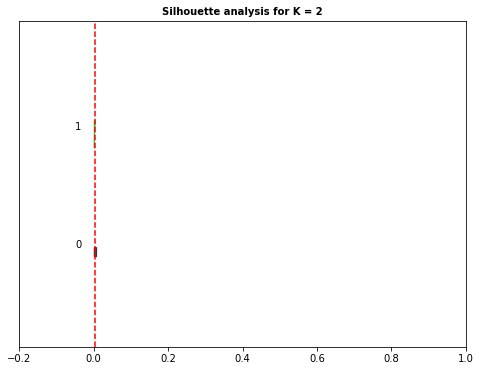

In [18]:
silhouette(kmeans_results, final_df, plot=True)

In [19]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

## Visualização dos resultados (Agrupamento)

##### Frequência de palavras (histograma e nuvem de palavras) 

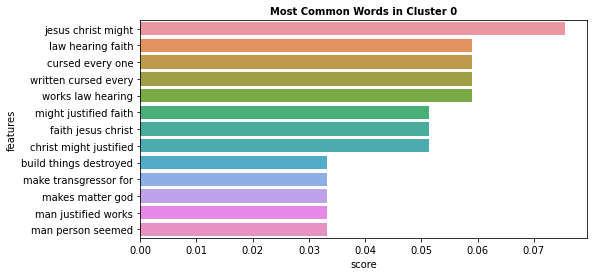

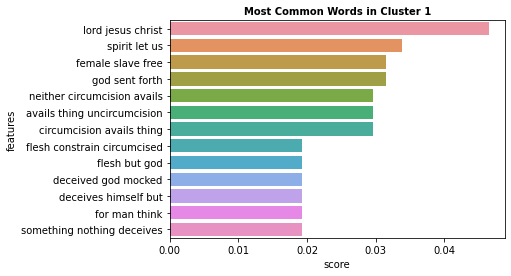

In [21]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [22]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

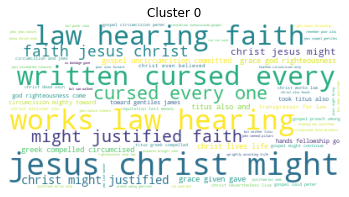

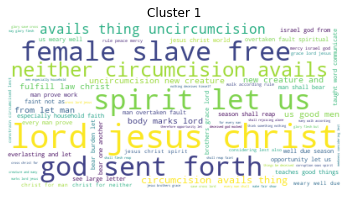

In [23]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

## Rótulos obtidos



In [24]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Galatas_1,"'paul', ',', 'apostle', ',', '(', 'men', ',', ...",1
101,Galatas_2,"'fourteen', 'years', 'went', 'jerusalem', 'bar...",0
102,Galatas_3,"'foolish', 'galatians', ',', 'bewitched', ',',...",0
103,Galatas_4,"'say', ',', 'heir', ',', 'long', 'child', ',',...",1
104,Galatas_5,"'stand', 'fast', 'therefore', 'liberty', 'chri...",1


In [25]:
print(df)

         Autor                                              Livro  label
100  Galatas_1  'paul', ',', 'apostle', ',', '(', 'men', ',', ...      1
101  Galatas_2  'fourteen', 'years', 'went', 'jerusalem', 'bar...      0
102  Galatas_3  'foolish', 'galatians', ',', 'bewitched', ',',...      0
103  Galatas_4  'say', ',', 'heir', ',', 'long', 'child', ',',...      1
104  Galatas_5  'stand', 'fast', 'therefore', 'liberty', 'chri...      1
105  Galatas_6  'brothers', ',', 'man', 'overtaken', 'fault', ...      1
